# Alpesh Patel

## LetsGrowMore Data Science Intern

# Task - 2
# Prediction using Decision Tree  Algorithm

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading data

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Relationship between the features

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


Text(0.5, 1.0, 'Visualize Co-Relationship between the features')

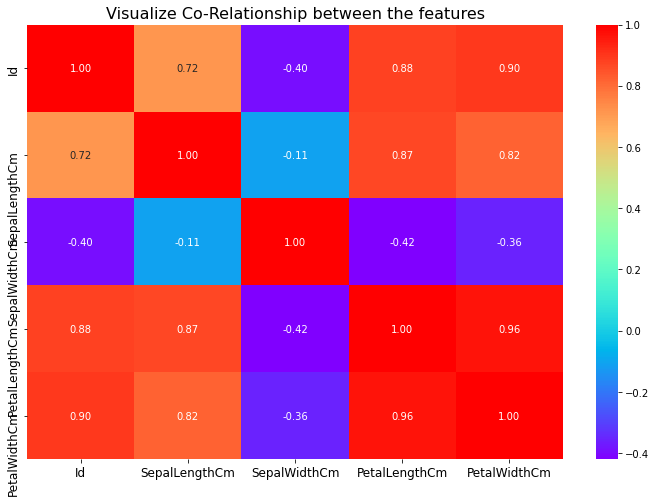

In [5]:
print(df.corr())
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize Co-Relationship between the features", fontsize = 16)

## Cheack Missing value

In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is Zero Missing value available

## Split dependent and independent data

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# The Decision Tree Classification model

In [9]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, splitter="best")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

### Save model

In [10]:
import pickle

pickle.dump(classifier, open('model', 'wb'))

### Load model

In [11]:
model = pickle.load(open('model', 'rb'))
model

DecisionTreeClassifier(criterion='entropy', random_state=10)

## Predict test set using our Random Forest Classification model

In [12]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

# Visualize the Decision Tree

[Text(401.76000000000005, 453.0, 'Id <= 101.0\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-setosa'),
 Text(267.84000000000003, 271.8, 'Id <= 50.5\nentropy = 1.0\nsamples = 76\nvalue = [39, 37, 0]\nclass = Iris-virginica'),
 Text(133.92000000000002, 90.59999999999997, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-virginica'),
 Text(401.76000000000005, 90.59999999999997, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-versicolor'),
 Text(535.6800000000001, 271.8, 'entropy = 0.0\nsamples = 44\nvalue = [0, 0, 44]\nclass = Iris-setosa')]

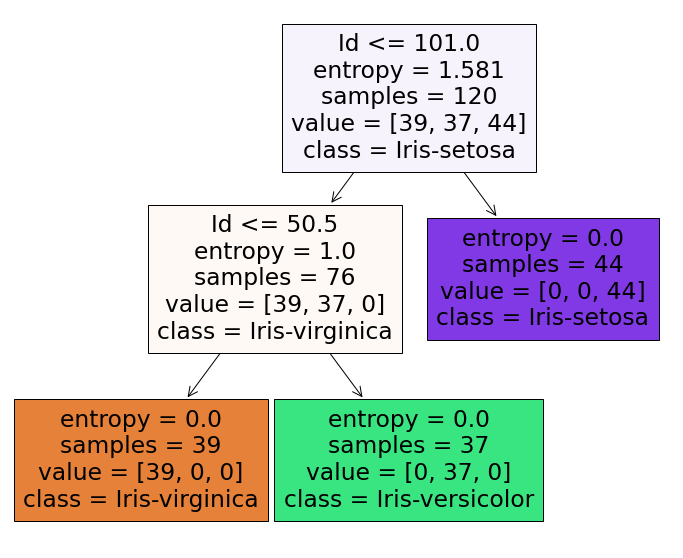

In [13]:
from sklearn import tree

plt.figure(figsize=(12, 10))
tree.plot_tree(model, filled=True, impurity=True, feature_names = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], class_names = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])

## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print(CM)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


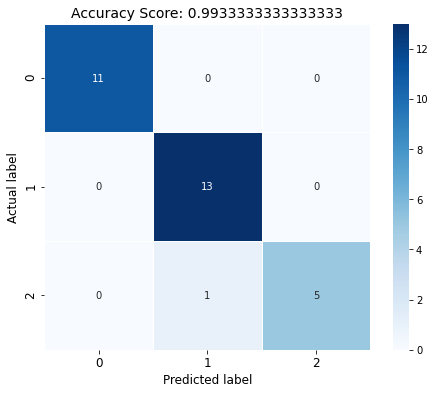

In [15]:
# plot confusion matrix
score = model.score(X, y)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 12);
plt.xlabel('Predicted label', fontsize = 12);
plt.title('Accuracy Score: {}'.format(score), size = 14);
plt.tick_params(labelsize= 12)

In [16]:
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(y_test, y_pred)*100, "%")

Accuracy :  96.66666666666667 %


# Classification_report

In [17]:
from sklearn import metrics

print (metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



**This Classification model can predict with 96.67 % Accuracy**